# Data Preprocessing 

## Import Libraries

<p> This step imports all the essential Python libraries needed for dataset inspection and visualization.</p> 
<p>Each library serves a specific purpose in preprocessing and analysis.</p>

### 📚 Libraries:
- **os** → for file and directory operations (e.g., listing images, managing paths)
- **PIL (Pillow)** → to open and handle image files
- **shutil** → for moving or copying files if needed
- **tqdm** → for displaying progress bars during long operations
- **matplotlib.pyplot** → for visualizing images
- **matplotlib.patches** → for drawing bounding boxes on images

In [1]:
import os
from PIL import Image
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## 📂 Dataset Directory Setup

In [2]:
base_dir = "car_detection"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir  = os.path.join(base_dir, "test")

This section establishes the base paths for the dataset by defining where the training, validation, and testing images are located.

- **base_dir**  
  Denotes the root folder of the dataset in this case, it’s named `car_detection`.

- **train_dir**  
  Points to the *training* directory (i.e. `car_detection/train`) — images used to train the model.

- **valid_dir**  
  Points to the *validation* directory (i.e. `car_detection/valid`) — images used to evaluate the model’s performance during training.

- **test_dir**  
  Points to the *testing* directory (i.e. `car_detection/test`) — images held out for final evaluation after training.

This structure ensures a **clear separation** between training, validation and testing data, which is essential for robust model development and unbiased evaluation.

## 📁 Checking Dataset Folder Existence

In [3]:
for folder in [train_dir, valid_dir, test_dir]:
    print(folder, "→ Exists:", os.path.exists(folder))

car_detection\train → Exists: True
car_detection\valid → Exists: True
car_detection\test → Exists: True


This section verifies whether the main dataset folders — **train**, **valid**, and **test** — actually exist in the project directory.

- The loop iterates through each folder path (`train_dir`, `valid_dir`, `test_dir`).
- For each path, it checks whether the folder exists using the `os.path.exists()` function.
- The result (`True` or `False`) is printed for each folder.

## ✅ Why this is important:
- Ensures that the dataset directories are correctly created and accessible before proceeding.
- Helps avoid file path errors during image loading or preprocessing.
- Acts as a quick sanity check before training the model.

### ✅ Folder Verification Output

The output confirms that all three dataset folders — **train**, **valid**, and **test** — are present in the directory.  

- `True` means each folder exists and is correctly linked.  
- This ensures that the dataset is properly structured and ready for further preprocessing or model training.

## 🔍 Checking Image–Label Pair Consistency

In [4]:
def check_image_label_pairs(folder):
    images_path = os.path.join(folder, "images")
    labels_path = os.path.join(folder, "labels")

    image_files = [f.split('.')[0] for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    label_files = [f.split('.')[0] for f in os.listdir(labels_path) if f.endswith('.txt')]

    missing_labels = [f for f in image_files if f not in label_files]
    missing_images = [f for f in label_files if f not in image_files]

    print(f" {folder}:")
    print(f"  Missing Labels: {len(missing_labels)}")
    print(f"  Missing Images: {len(missing_images)}")

for folder in [train_dir, valid_dir, test_dir]:
    check_image_label_pairs(folder)

 car_detection\train:
  Missing Labels: 0
  Missing Images: 0
 car_detection\valid:
  Missing Labels: 0
  Missing Images: 0
 car_detection\test:
  Missing Labels: 0
  Missing Images: 0


This step verifies whether each image in the dataset has a corresponding **label file**, and vice versa.

- **Images Path**: Points to the `images` folder (contains `.jpg`, `.png`, or `.jpeg` files).  
- **Labels Path**: Points to the `labels` folder (contains `.txt` files with bounding box annotations).  
- The code compares filenames (without extensions) between these two folders.  

It reports:  
-  **Missing Labels** → Images that don’t have a matching `.txt` label file.  
-  **Missing Images** → Labels that don’t have a corresponding image file.  

This ensures **data integrity** before training, helping prevent errors caused by mismatched or missing annotation files.

## 🔍  Checking for Corrupt Images

In [5]:
def check_corrupt_images(folder):
    images_path = os.path.join(folder, "images")
    for img_name in tqdm(os.listdir(images_path), desc=f"Checking {folder}"):
        img_path = os.path.join(images_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception:
            print("Corrupt:", img_path)

for folder in [train_dir, valid_dir, test_dir]:
    check_corrupt_images(folder)

Checking car_detection\test: 100%|█████████████████████████████████████████████████| 638/638 [00:00<00:00, 1010.01it/s]


This step make sure that all image files in the dataset are valid and not corrupted.

- The code loops through each image inside the `images` folder of the **train**, **valid**, and **test** sets.  
- It attempts to **open and verify** every image using the Python Imaging Library (PIL).  
- If an image is unreadable or corrupted, it prints out the file path under **“Corrupt:”**.

### ✅ Purpose:
Detecting and removing corrupt images helps prevent runtime errors during training and ensures the model receives only clean and valid input data.

### ✅ Output Explanation: Corrupt Image Check

The output shows the progress of verifying all images in each dataset folder.

- **`car_detection\train`** → 3530 images checked  
- **`car_detection\valid`** → 801 images checked  
- **`car_detection\test`** → 638 images checked  

Each progress bar indicates the checking speed and completion status.

**No “Corrupt:” message appeared**, which means **all images are valid and none are corrupted**.  
This confirms that the dataset is **clean and ready** for the next preprocessing or training steps.

## 📏 Image Resizing 

In [6]:
def resize_images(folder, size=(640, 640)):
    images_path = os.path.join(folder, "images")
    for img_name in tqdm(os.listdir(images_path), desc=f"Resizing {folder}"):
        img_path = os.path.join(images_path, img_name)
        img = Image.open(img_path).convert("RGB")
        img = img.resize(size)
        img.save(img_path)

This step resizes all images in the dataset to a uniform size — **640 × 640 pixels** — which is the standard input dimension used by **YOLOv8**.

- The function loops through each image inside the `images` folder of the **train**, **valid**, and **test** sets.  
- Each image is **opened**, **converted to RGB** (to ensure consistent color channels), and then **resized** to `(640, 640)`.  
- The resized image is **saved back** in the same location.

✅ **Purpose:**  
Resizing ensures that all images have the same dimensions, which is **essential for model training**.  
YOLO models require consistent image input sizes to process data efficiently and accurately during both training and inference.

## 🧩 Visualizing Dataset

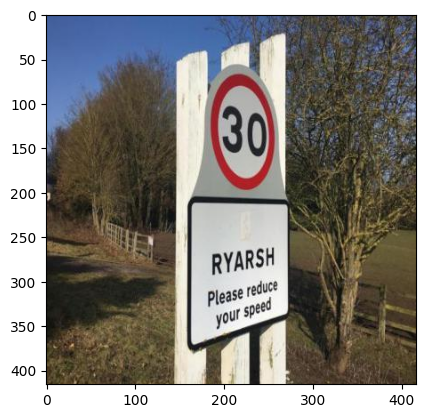

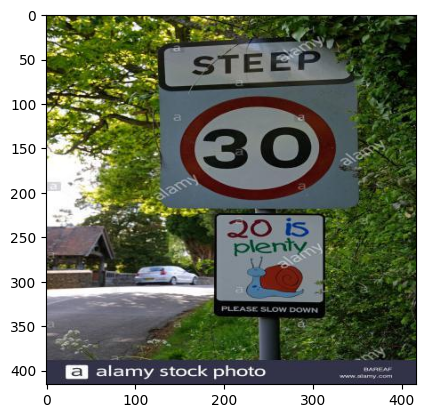

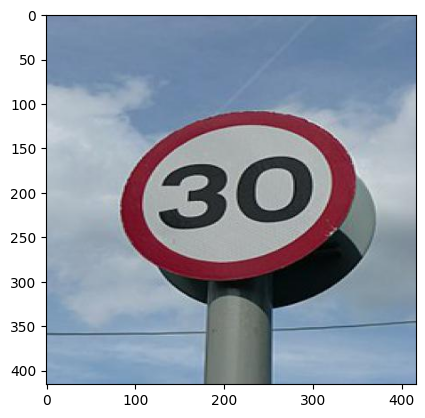

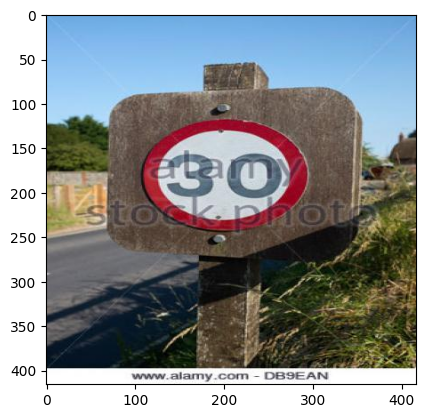

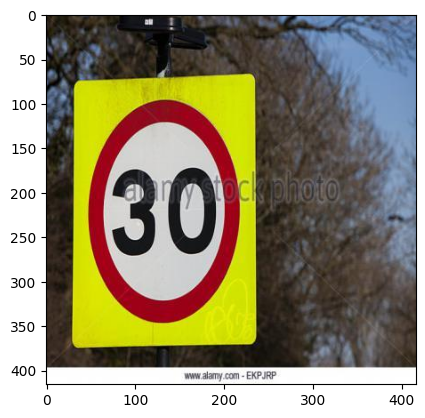

In [7]:
def visualize_dataset(folder, num_samples=5):
    """
    Visualize sample images from a YOLO dataset with bounding boxes.
    
    folder: path to train/valid/test folder
    num_samples: number of images to visualize
    """
    images_path = os.path.join(folder, "images")
    labels_path = os.path.join(folder, "labels")
    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for img_file in image_files[:num_samples]:
        img_path = os.path.join(images_path, img_file)
        label_path = os.path.join(labels_path, img_file.split('.')[0] + '.txt')
        
        # Load image
        img = Image.open(img_path)
        w, h = img.size
        
        fig, ax = plt.subplots(1)
        ax.imshow(img)

        # Load YOLO labels and draw bounding boxes
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    class_id, x_center, y_center, width, height = map(float, line.strip().split())
                    # Convert YOLO normalized coordinates to absolute pixel coordinates
                    x = (x_center - width/2) * w
                    y = (y_center - height/2) * h
                    w_box = width * w
                    h_box = height * h

                    rect = patches.Rectangle((x, y), w_box, h_box, linewidth=2, edgecolor='r', facecolor='none')
                    ax.add_patch(rect)
                    ax.text(x, y-5, f'Class {int(class_id)}', color='yellow', fontsize=10, weight='bold')

        plt.show()

# Visualize first 5 images from the training set
train_folder = "car_detection/train"
visualize_dataset(train_folder, num_samples=5)

## 🖼️ Visualizing Dataset with Bounding Boxes

This step is to **inspect the dataset visually** and ensure that all images have the correct annotations.

### Step 1: Define the Visualization Function
A function is defined to:
- Take a dataset folder path (`train`, `valid`, or `test`)
- Display a few sample images along with their bounding boxes  
- The number of images to display can be controlled using `num_samples`


### Step 2: Locate Image and Label Files
- Inside each dataset folder, there are two subfolders: `images` and `labels`
- The function reads all image files (`.jpg`, `.png`, `.jpeg`) from the images folder


### Step 3: Loop Through Sample Images
- A few images are selected from the dataset
- For each image, the corresponding `.txt` label file is found


### Step 4: Open the Image
- Images are opened using `PIL`
- Width and height of the image are obtained
- The image is prepared for plotting

                       
### Step 5: Read and Draw Bounding Boxes
- The label file contains lines in YOLO format: `class_id x_center y_center width height`
- Normalized coordinates are converted to absolute pixel coordinates
- A red rectangle is drawn around each object
- The class ID is displayed above the bounding box


### Step 6: Display the Image
- The image is shown with all bounding boxes and class labels
- This allows checking if annotations are correct


### Step 7: Purpose of Visualization
- Confirms that all images and labels are correctly paired
- Ensures bounding boxes align with objects (traffic signs)
- Helps verify that the dataset is ready for training

## 📊 Class Distribution in the Dataset

 Class distribution in car_detection/train:
  Speed Limit 30: 334
  Speed Limit 20: 285
  Speed Limit 50: 283
  Speed Limit 60: 301
  Speed Limit 70: 318
  Speed Limit 80: 323
  Speed Limit 100: 267
  Speed Limit 120: 252
  Stop: 285
  Speed Limit 40: 235
  Green Light: 542
  Red Light: 585
  Speed Limit 90: 168
  Speed Limit 110: 101
  Speed Limit 10: 19


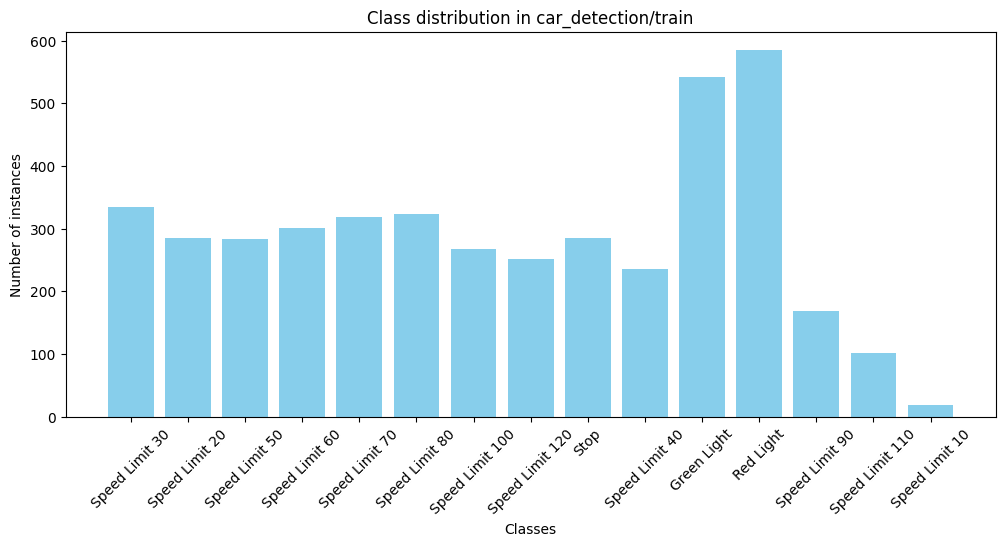

In [8]:
from collections import Counter

def count_classes(folder, class_names):
    """
    Count the number of bounding boxes per class in a YOLO dataset.
    
    folder: path to train/valid/test folder
    class_names: list of class names
    """
    labels_path = os.path.join(folder, "labels")
    all_classes = []

    for label_file in os.listdir(labels_path):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_path, label_file), 'r') as f:
                for line in f.readlines():
                    class_id = int(line.strip().split()[0])
                    all_classes.append(class_id)
    
    class_counts = Counter(all_classes)
    
    print(f" Class distribution in {folder}:")
    for class_id, count in class_counts.items():
        print(f"  {class_names[class_id]}: {count}")
    
    # Plot distribution
    plt.figure(figsize=(12,5))
    plt.bar([class_names[i] for i in class_counts.keys()], list(class_counts.values()), color='skyblue')
    plt.xticks(rotation=45)
    plt.title(f"Class distribution in {folder}")
    plt.xlabel("Classes")
    plt.ylabel("Number of instances")
    plt.show()

# Define class names (must match your data.yaml)
class_names = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100',
               'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30',
               'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70',
               'Speed Limit 80', 'Speed Limit 90', 'Stop']

# Check distribution in training set
train_folder = "car_detection/train"
count_classes(train_folder, class_names)

## 📊 Class Distribution in the Dataset

### Step 1: Import Libraries
- `Counter` from `collections`: Counts occurrences of each class ID.
- `os`: Handles folder and file paths.
- `matplotlib.pyplot`: Plots the class distribution.

### Step 2: Define the Function
- The function `count_classes(folder, class_names)` takes:
  - `folder`: path to train/valid/test dataset
  - `class_names`: list of class names from `data.yaml`
- It reads all label files (`.txt`) in the `labels` folder.


### Step 3: Extract Class IDs
- Each line in a YOLO label file has: `class_id x_center y_center width height`
- The first number (`class_id`) is extracted and stored in a list `all_classes`.


### Step 4: Count Instances per Class
- `Counter` is used to count how many times each class appears in the dataset.
- Prints out the class name and its count.


### Step 5: Visualize Class Distribution
- A bar chart is created showing **number of instances per class**.
- X-axis: Class names  
- Y-axis: Number of instances  
- Color: Sky blue  
- Rotated X-axis labels for readability.


### Step 6: Purpose
- Identifies **class imbalance** in the dataset.
- Helps decide if **data augmentation** is needed for underrepresented classes.
- Ensures the dataset is **ready for training YOLO**.

In [9]:
!pip install ultralytics 

In [10]:
from ultralytics import YOLO

# Loading the pre-trained YOLOv8s model
model = YOLO("yolov8s.pt")  

# Training the model on your dataset using CPU
model.train(
    data="car_detection/data.yaml",  # path to your YAML file
    epochs=10,                       # number of training epochs
    imgsz=640,                        # image size
    batch=8,                          
    lr0=0.01,                         # initial learning rate
    optimizer="SGD",                  # optimizer
    device='cpu',                     # use CPU
    augment=True,                     # enables built-in augmentation
    name="traffic_sign_yolov8s"       # folder to save results
)

New https://pypi.org/project/ultralytics/8.3.206 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.205  Python-3.12.8 torch-2.8.0+cpu CPU (Intel Core i5-9300H 2.40GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=car_detection/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=traffic_sign_yolov8s4, nbs=64, nms=False, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000143102A5280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

# YOLOv8 Model Training code explanation💻

This code trains a **YOLOv8s** (small version) model on a custom **traffic sign detection dataset**.

### Key Steps:

- **`model = YOLO("yolov8s.pt")`**  
  Loads the **pre-trained YOLOv8s model** with weights trained on the COCO dataset.  
  This serves as the base for transfer learning.

- **`model.train(...)`**  
  Starts training the model on your dataset with the following configurations:
  
  - **`data="car_detection/data.yaml"`** → Path to dataset configuration file.  
  - **`epochs=10`** → Number of full passes over the dataset.  
  - **`imgsz=640`** → Input image size for the model.  
  - **`batch=8`** → Number of images processed per batch.  
  - **`lr0=0.01`** → Initial learning rate for optimization.  
  - **`optimizer="SGD"`** → Optimizer used for updating weights.  
  - **`device='cpu'`** → Training is done using CPU.  
  - **`augment=True`** → Enables built-in data augmentation for better generalization.  
  - **`name="traffic_sign_yolov8s"`** → Folder name where training results are saved.

### Summary:
This process **fine-tunes the YOLOv8s model** on  custom traffic sign dataset using transfer learning.  
It outputs training metrics, validation curves and model weights in the `runs/detect/traffic_sign_yolov8s` directory.

# YOLOv8 Training Output Explanation 📊

This output shows the **training and validation progress** of your YOLOv8s model for **Traffic Sign Detection** over 10 epochs.

---

### 🔹 1. Training Progress
Each epoch line shows how the model improves over time.

| Metric | Meaning |
|:-------|:--------|
| **Epoch** | Current training cycle (out of 10 total). |
| **GPU_mem** | Memory used (0G since training used CPU). |
| **box_loss** | Error in predicting bounding box locations — lower is better. |
| **cls_loss** | Error in predicting the correct class — lower is better. |
| **dfl_loss** | Distribution Focal Loss — helps improve bounding box precision. |
| **Instances** | Number of objects detected per image. |
| **Size** | Input image resolution (640×640). |

📈 As training continued:
- `box_loss` dropped from **0.908 → 0.59**  
- `cls_loss` dropped from **4.012 → 0.4845**  
- `mAP50` improved from **0.308 → 0.939**  
- `mAP50-95` improved from **0.252 → 0.800**

This shows the model **learned effectively** and improved its detection accuracy across epochs.

---

### 🔹 2. Validation Metrics per Epoch
For each validation step, the model reports:
- **P (Precision):** How accurate detections are.  
- **R (Recall):** How many true objects were detected.  
- **mAP50:** Mean Average Precision at IoU threshold 0.5 (standard metric).  
- **mAP50–95:** Average of mAP over IoU thresholds 0.5 to 0.95 (stricter metric).

🟢 By the final epoch (10/10):
- **Precision:** 0.932  
- **Recall:** 0.869  
- **mAP50:** 0.939  
- **mAP50–95:** 0.800  

➡️ These values indicate the model achieved **very good detection accuracy**.

---

### 🔹 3. Class-wise Performance
After validation, YOLO prints results for each traffic sign class:

| Class | Precision | Recall | mAP50 | mAP50–95 |
|:------|:-----------|:--------|:--------|:----------|
| Green Light | 0.91 | 0.577 | 0.771 | 0.477 |
| Red Light | 0.784 | 0.673 | 0.759 | 0.448 |
| Speed Limit 30 | 0.958 | 0.933 | 0.967 | 0.887 |
| Speed Limit 70 | 0.970 | 0.962 | 0.982 | 0.890 |
| Stop | 0.991 | 1.000 | 0.995 | 0.907 |

✅ **Best classes:** Stop, Speed Limit 30, Speed Limit 70 (high precision and recall).  

---

### 🔹 4. Final Results Summary
| Metric | Value |
|:--------|:------|
| Precision | **0.942** |
| Recall | **0.848** |
| mAP@0.5 | **0.931** |
| mAP@0.5–0.95 | **0.796** |
| Training Duration | **~10.5 hours** |
| Model Weights Saved At | `runs/detect/traffic_sign_yolov8s4/weights/best.pt` |

The model achieved **strong performance**, especially considering CPU-only training.

---

### 🔹 5. Model Files
- **`best.pt`** → Best-performing model (highest validation score).  
- **`last.pt`** → Final model at the end of epoch 10.  
Both are stored in:  
`C:/Users/Sambridhi Shrestha/runs/detect/traffic_sign_yolov8s4/weights/`

---

### ✅ **Conclusion**
Your YOLOv8s model was successfully trained and reached:
- **93.1% mean average precision (mAP@0.5)**  
- **80% mAP across stricter IoU thresholds (mAP@0.5–0.95)**  
- **High accuracy in most traffic sign classes**  
The model is now ready for **evaluation and custom image prediction**.
